In [1]:
import numpy as np
import sympy as sp
from math import ceil
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

/home/grapefroot/datascience2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
steps = map(lambda x: 1./(2**x + 1), range(1, 16))

In [3]:
def generate_points(step):
    num=int(ceil(1./step))
    return np.linspace(start=0, stop=1, num=num, endpoint=True), num

In [4]:
x = sp.symbols('x')
f = sp.symbols('f', cls=sp.Function)

In [5]:
f1 = x**4
f2 = sp.exp(2*x)

In [6]:
def integrate(function, (a,b)=(0,1)):
    integrated = function.integrate()
    return integrated.subs(x, b) - integrated.subs(x, a)

In [7]:
def rectangle(function, step=0.2):
    points, num = generate_points(step)
    return sum(
        [function.subs(x, (points[i] + points[i+1])/2)*(points[i+1]-points[i]) for i in range(num - 1)])

In [8]:
def trapeze(function, step=0.2):
    points, num = generate_points(step)
    subs = lambda y: function.subs(x, points[y])
    return (sum([subs(i) for i in range(1, num - 1)]) + (subs(0) + subs(-1))/2)*step

In [9]:
def simpson(function, step=0.2):
    points, num = generate_points(step)
    subs = lambda y: function.subs(x, points[y])
    return sum([subs(i-1) + 4*subs(i) + subs(i+1) for i in range(1, num - 1, 2)])*step/3.

Аналитические значения

In [10]:
val_f1 = integrate(f1)
print val_f1

1/5


In [11]:
integrate(f2)

-1/2 + exp(2)/2

In [12]:
val_f2 = -1./2 + np.exp(2)/2
print val_f2

3.19452804947


Приближенные

In [13]:
for step in steps:
    print rectangle(f1, step), trapeze(f1, step), simpson(f1, step)

0.160156250000000 0.187500000000000 0.138888888888889
0.189697265625000 0.176562500000000 0.160416666666667
0.197402954101563 0.182400173611111 0.177806712962963
0.199349403381348 0.189460305606618 0.188237208946078
0.199837267398834 0.194255019679214 0.193939517242740
0.199959311634302 0.197003203171950 0.196923084748097
0.199989827582613 0.198469799618388 0.198449612895956
0.199997456875280 0.199226856347652 0.199221789914192
0.199999364217547 0.199611405538827 0.199610136454178
0.199999841054307 0.199805195630051 0.199804878048902
0.199999960263570 0.199902470844516 0.199902391410452
0.199999990065893 0.199951203656385 0.199951183793019
0.199999997516473 0.199975593883817 0.199975588917369
0.199999999379118 0.199987794955451 0.199987793713763
0.199999999844780 0.199993896981065 0.199993896670634


In [14]:
for step in steps:
    print rectangle(f2, step), trapeze(f2, step), simpson(f2, step)

3.06520517051910 2.30426995930812 2.14024260141854
3.16149276669200 2.60864404379251 2.55648407466677
3.18622410605414 2.85435458730339 2.83964165574063
3.19244922602180 3.01052847848022 3.00661870519988
3.19400816598111 3.09873247728826 3.09772443165376
3.19439806748853 3.14563743172166 3.14538148075183
3.19449555327695 3.16982875489282 3.16976426718573
3.19451992537484 3.18211416420476 3.18209797929980
3.19452601843999 3.18830495340464 3.18830089927556
3.19452754170882 3.19141245125645 3.19141143673440
3.19452792252619 3.19296923633367 3.19296898257932
3.19452801773054 3.19374838920706 3.19374832575298
3.19452804153162 3.19413815588987 3.19413814002440
3.19452804748190 3.19433308681310 3.19433308284650
3.19452804896946 3.19443056417273 3.19443056318104


In [15]:
points_rectangle_f1 = np.array(map(lambda x: np.abs(rectangle(f1, x) - val_f1), steps), dtype=np.float64)
points_rectangle_f2 = np.array(map(lambda x: np.abs(rectangle(f2, x) - val_f2), steps), dtype=np.float64)
points_trapeze_f1 = np.array(map(lambda x: np.abs(trapeze(f1, x) - val_f1), steps), dtype=np.float64)
points_trapeze_f2 = np.array(map(lambda x: np.abs(trapeze(f2, x) - val_f2), steps), dtype=np.float64)
points_simpson_f1 = np.array(map(lambda x: np.abs(simpson(f1, x) - val_f1), steps), dtype=np.float64)
points_simpson_f2 = np.array(map(lambda x: np.abs(simpson(f2, x) - val_f2), steps), dtype=np.float64)

In [154]:
def plot_err(points):
    plot = plt.figure(figsize=(10, 10))
    x = np.log2(steps[:len(points)])
    y = np.log2(points)
    plt.scatter(x, y, label='rectangle',marker='*')
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")
    plt.legend()
    print "y=%.6fx+(%.6f)"%(z[0],z[1])

y=2.102021x+(-1.769215)


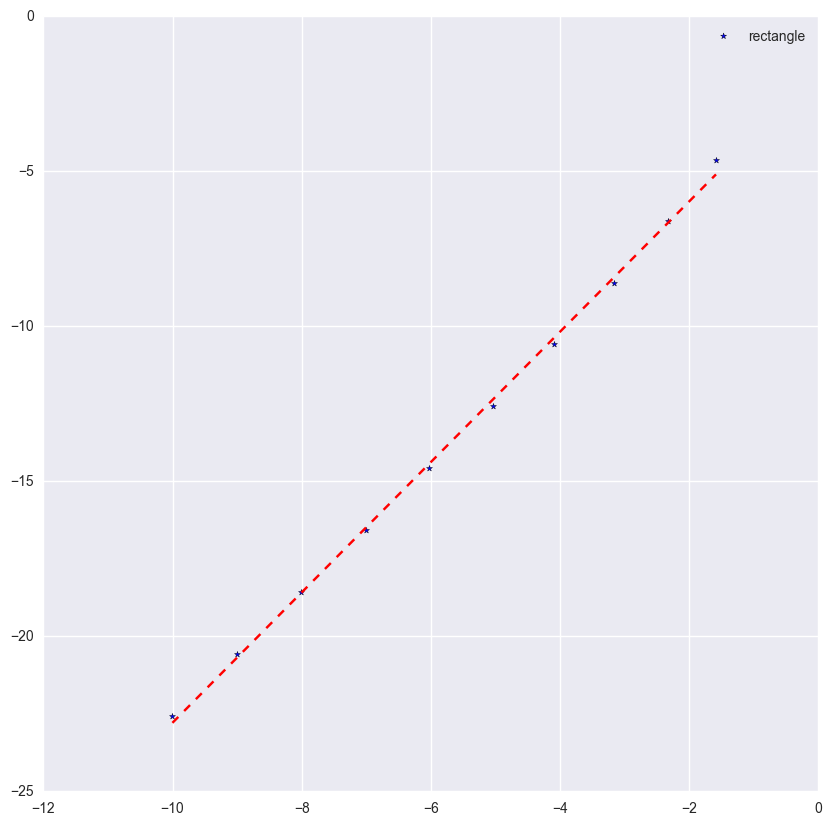

In [151]:
plot_err(points_rectangle_f1[:10])

y=1.193681x+(-12.490721)


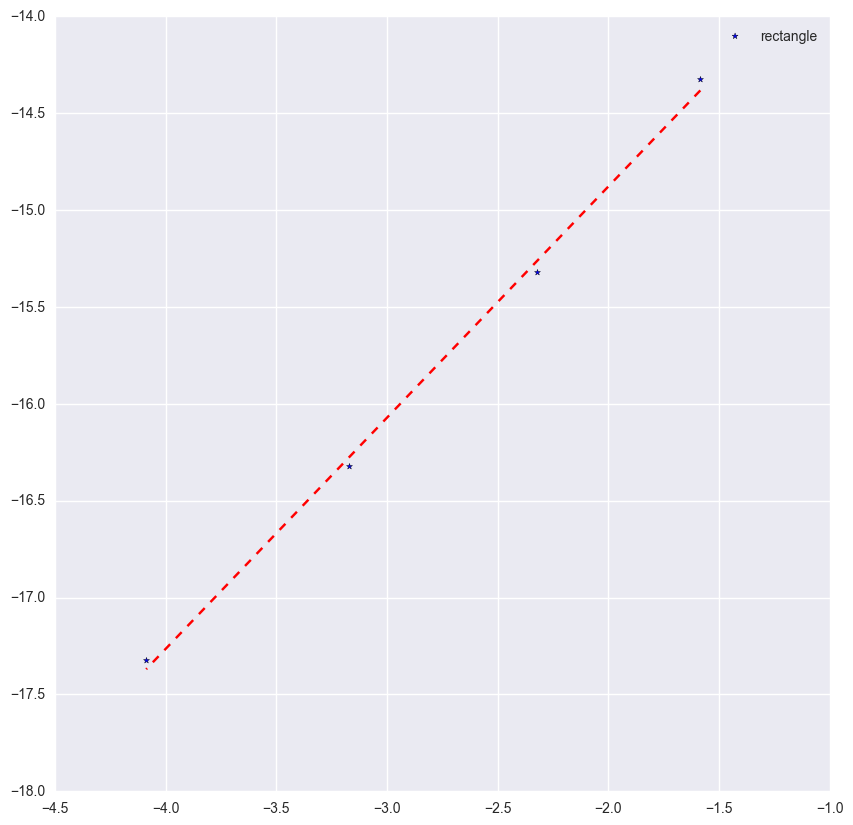

In [156]:
plot_err(points_trapeze_f1[-4:])

y=1.148410x+(-11.599361)


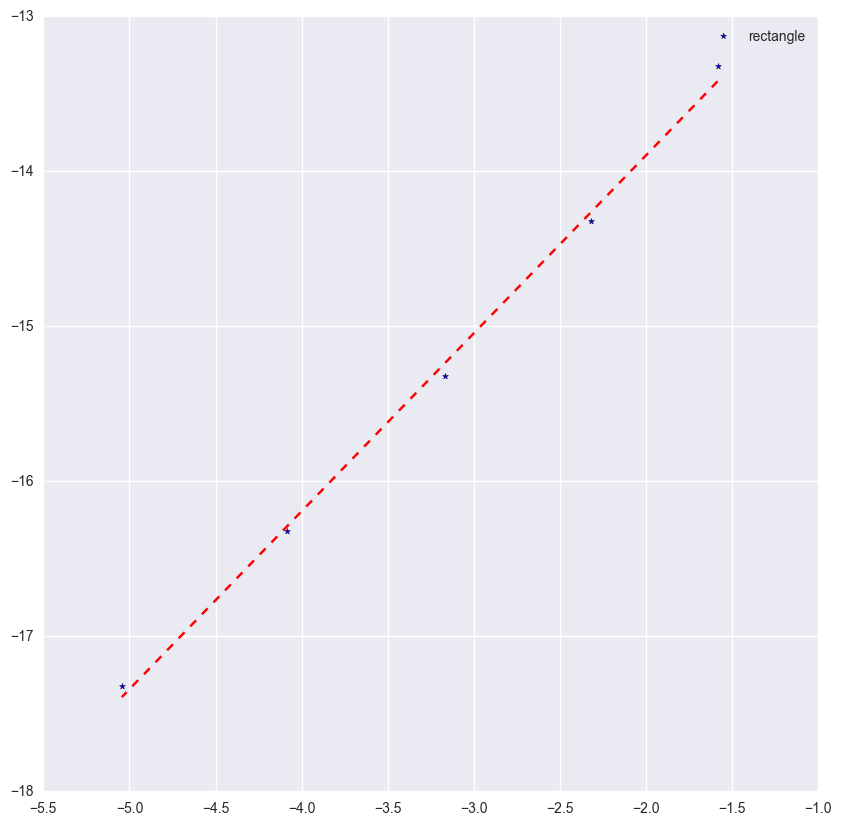

In [157]:
plot_err(points_simpson_f1[-5:])

y=2.051589x+(-0.328910)


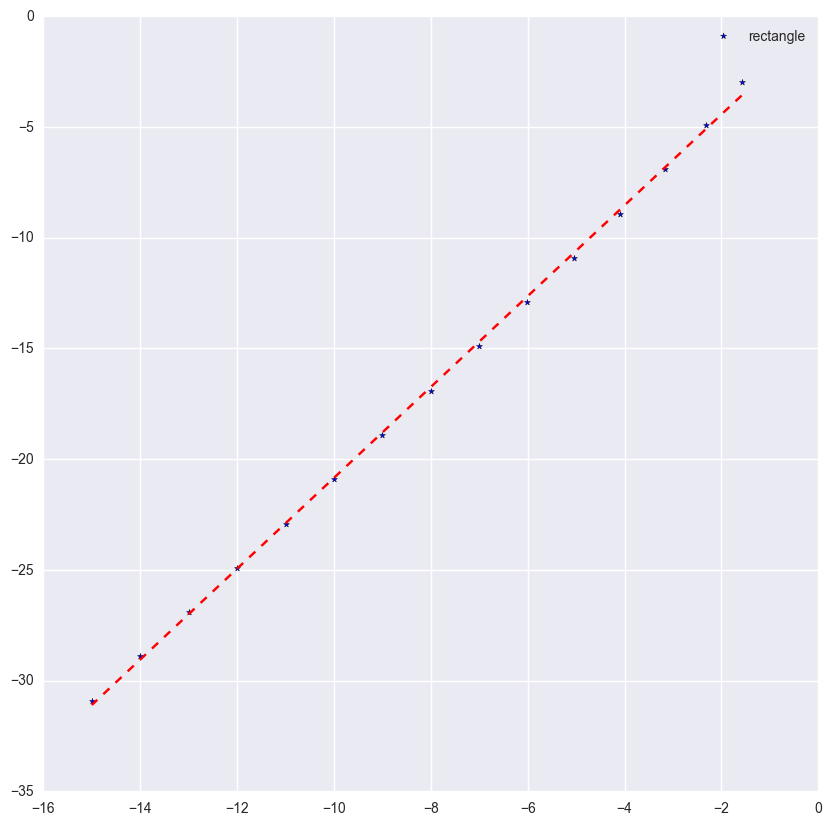

In [143]:
plot_err(points_rectangle_f2)

y=0.989141x+(1.554144)


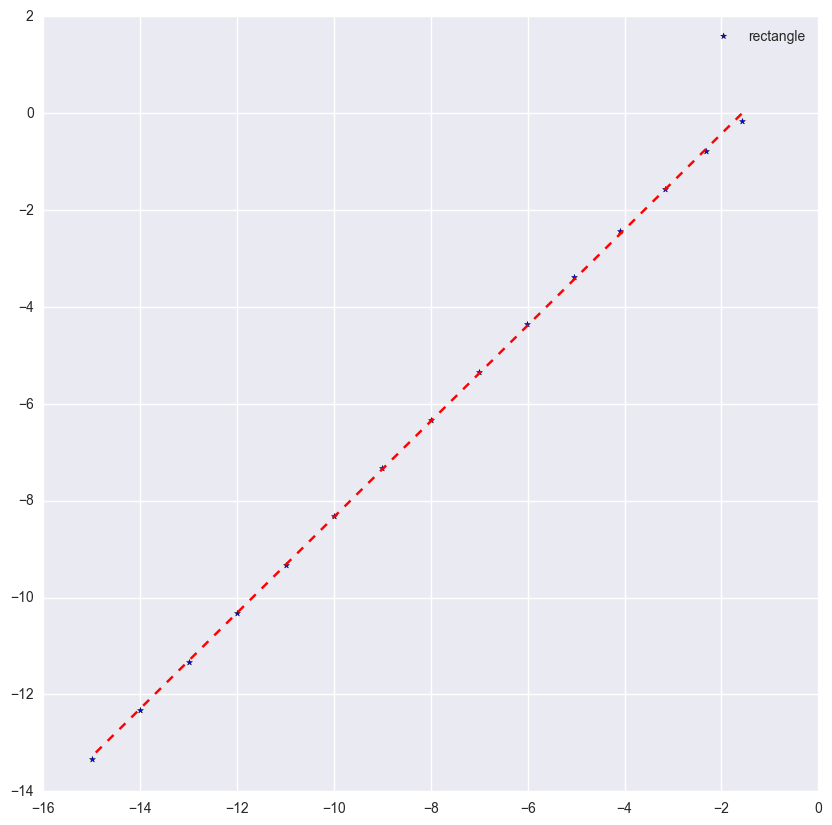

In [144]:
plot_err(points_trapeze_f2)

y=0.999601x+(1.671269)


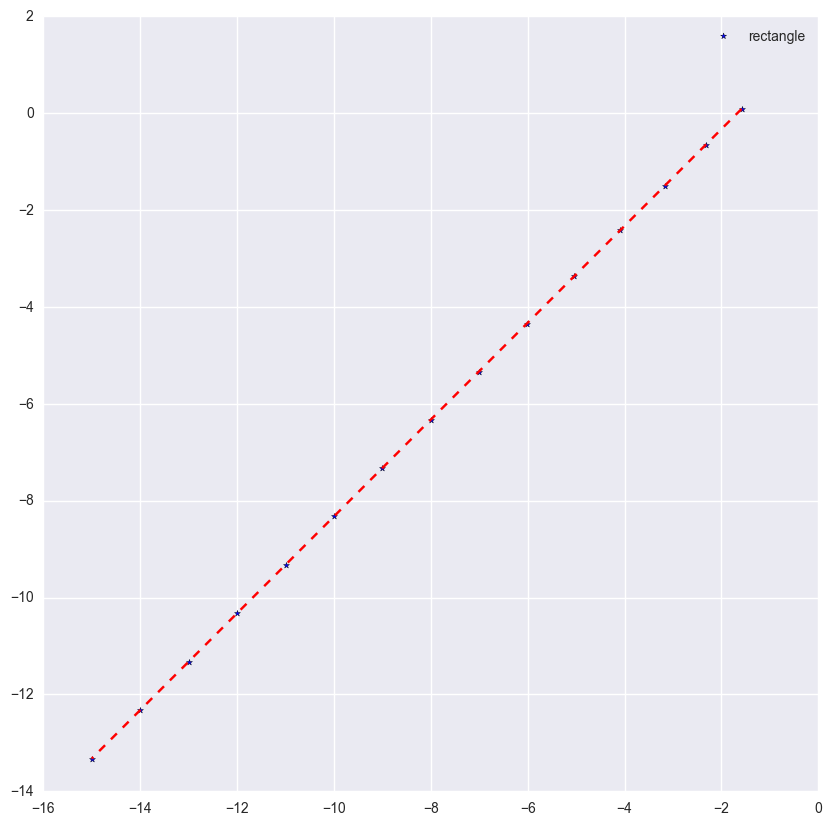

In [145]:
plot_err(points_simpson_f2)